# Bike Details Dataset

In [52]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [53]:
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')

min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price

print("Minimum Selling Price:", min_price)
print("Maximum Selling Price:", max_price)
print("Range of Selling Prices:", price_range)


Minimum Selling Price: 5000
Maximum Selling Price: 760000
Range of Selling Prices: 755000


In [54]:
median_price = df['selling_price'].median()

print("Median Selling Price:", median_price)

Median Selling Price: 45000.0


In [55]:
most_common_seller = df['seller_type'].mode()[0]
print("Most Common Seller Type (mode):", most_common_seller)

Most Common Seller Type (mode): Individual


In [56]:
count_high_km = (df['km_driven'] > 50000).sum()

print("Number of bikes driven more than 50,000 km:", count_high_km)

Number of bikes driven more than 50,000 km: 170


In [57]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()

print("Average km_driven for each ownership type:")
print(avg_km_by_owner)

Average km_driven for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [58]:
count_old_bikes = (df['year'] <= 2015).sum()

total_bikes = len(df)

proportion_old_bikes = count_old_bikes / total_bikes
print(f"Proportion of bikes from 2015 or older: {proportion_old_bikes:.2f}")


Proportion of bikes from 2015 or older: 0.57


In [59]:
missing_values = df.isnull().sum()

missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("Missing values summary per column:")
print(missing_summary)

Missing values summary per column:
                   Missing Count  Missing Percentage
name                           0            0.000000
selling_price                  0            0.000000
year                           0            0.000000
seller_type                    0            0.000000
owner                          0            0.000000
km_driven                      0            0.000000
ex_showroom_price            435           40.999057


In [60]:
max_price = df['ex_showroom_price'].max()

bike_max_price = df[df['ex_showroom_price'] == max_price]['name'].values

print(f"Highest ex_showroom_price: {max_price}")
print("Bike(s) with the highest ex_showroom_price:")
for bike in bike_max_price:
    print(bike)

Highest ex_showroom_price: 1278000.0
Bike(s) with the highest ex_showroom_price:
Harley-Davidson Street Bob


In [61]:
seller_type_counts = df['seller_type'].value_counts()

print("Total number of bikes listed by each seller type:")
print(seller_type_counts)


Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Correlation between selling_price and km_driven (1st owner bikes): -0.24


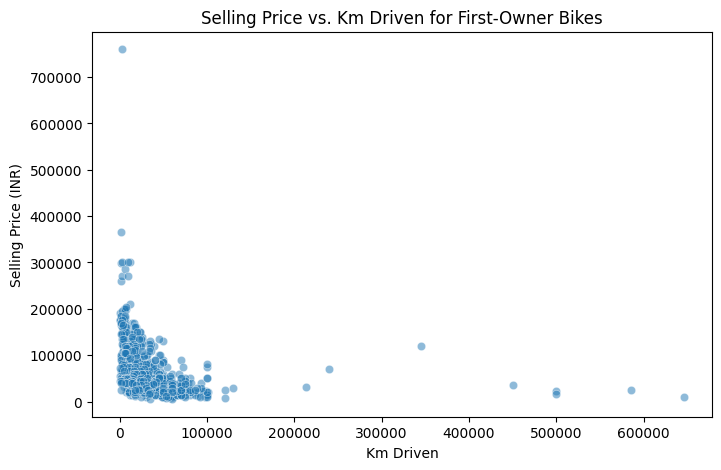

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

first_owner_df = df[df['owner'] == '1st owner']

correlation = first_owner_df['selling_price'].corr(first_owner_df['km_driven'])
print(f"Correlation between selling_price and km_driven (1st owner bikes): {correlation:.2f}")

plt.figure(figsize=(8,5))
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price', alpha=0.5)
plt.title('Selling Price vs. Km Driven for First-Owner Bikes')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price (INR)')
plt.show()

In [63]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]

print("Data after removing outliers:", df.shape)

Data after removing outliers: (1022, 7)


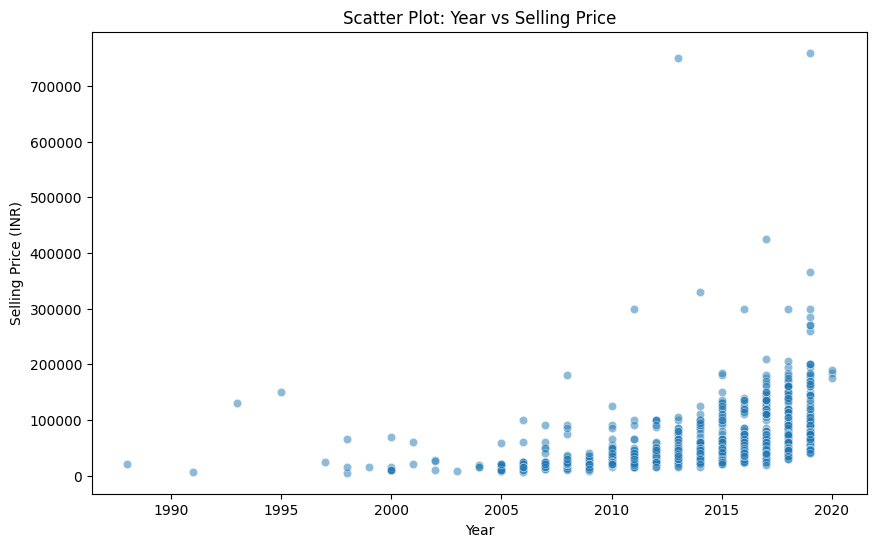

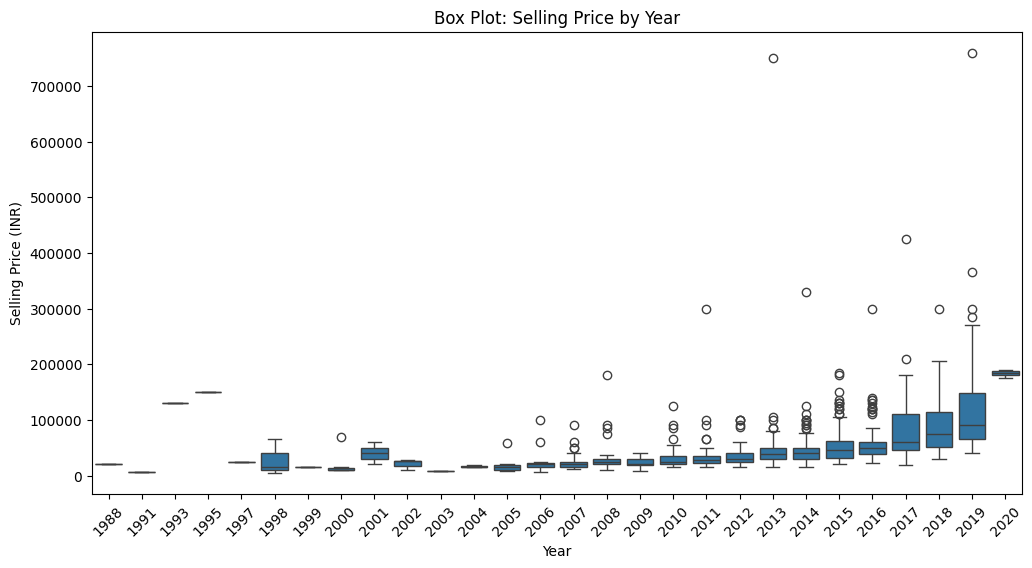

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.5)
plt.title('Scatter Plot: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title('Box Plot: Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.xticks(rotation=45)
plt.show()

In [65]:
current_year = 2025
df['age'] = current_year - df['year']

df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

avg_depreciation_by_age = df.groupby('age')['depreciation'].mean().reset_index()

print("Average depreciation by bike age:")
print(avg_depreciation_by_age)

Average depreciation by bike age:
    age  depreciation
0     5 -34260.000000
1     6   2954.562500
2     7  13023.194805
3     8  22307.226190
4     9  28750.407407
5    10  28314.291139
6    11  34287.812500
7    12  42766.423077
8    13  36609.529412
9    14  47758.750000
10   15  46757.280000
11   16  41398.909091
12   17  53021.166667
13   18  42399.000000
14   19  39664.500000
15   20  44852.000000
16   21  36852.000000
17   22           NaN
18   23           NaN
19   24  34852.000000
20   25           NaN
21   26           NaN
22   27           NaN
23   28           NaN
24   30           NaN
25   32           NaN
26   34           NaN
27   37           NaN


In [66]:
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_by_year.rename(columns={'selling_price': 'avg_price'}, inplace=True)

df = pd.merge(df, avg_price_by_year, on='year')

threshold = 1.20

above_avg_bikes = df[df['selling_price'] > threshold * df['avg_price']]
result = above_avg_bikes[['name', 'year', 'selling_price', 'avg_price']]
print("Bikes priced significantly above average for their manufacturing year:")
print(result)


Bikes priced significantly above average for their manufacturing year:
                                     name  year  selling_price      avg_price
0               Royal Enfield Classic 350  2019         175000  119689.511628
2     Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   36404.000000
13                          Yamaha YZF R3  2019         365000  119689.511628
17                       Yamaha YZF R15 S  2010          40000   32350.877193
..                                    ...   ...            ...            ...
948             Royal Enfield Classic 500  2014          95000   49121.348315
949             Royal Enfield Classic 500  2011          90000   35931.017241
969                    TVS Apache RTR 160  2014          60000   49121.348315
972                    Bajaj Pulsar 220 F  2012          52000   36157.560606
987                Bajaj Avenger 220 dtsi  2012          45000   36157.

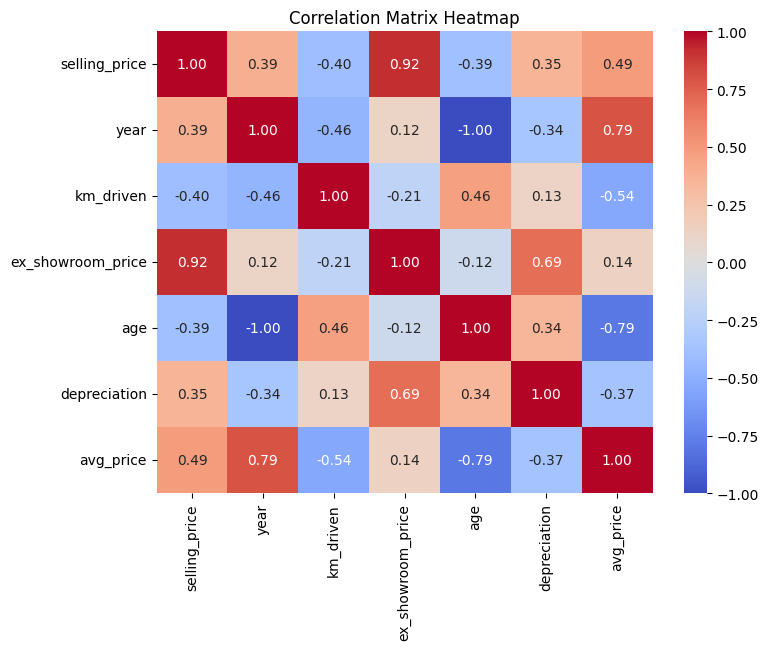

In [67]:
numeric_cols = df.select_dtypes(include=['number'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Car Sale Dataset

In [69]:
from google.colab import files
uploaded = files.upload()

Saving Car Sale.csv to Car Sale.csv


In [70]:
import pandas as pd

df = pd.read_csv('Car Sale.csv')


Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

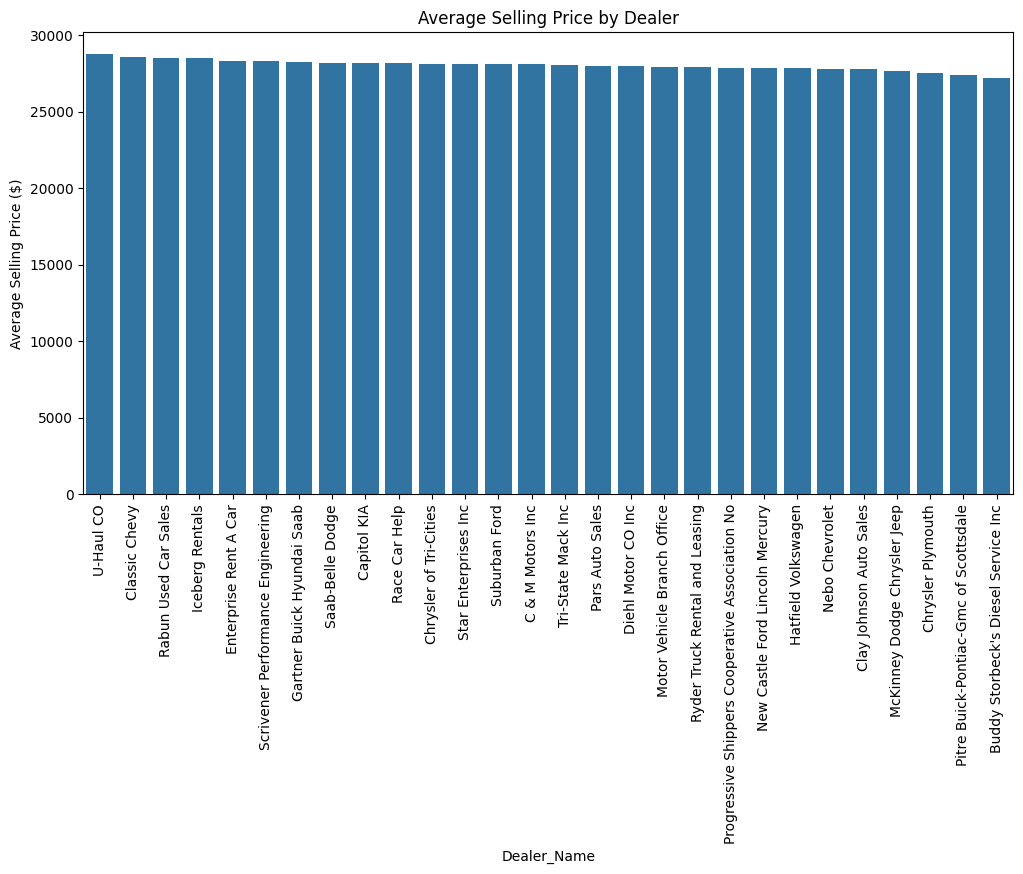

In [71]:
avg_price_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

print(avg_price_dealer)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_dealer.index, y=avg_price_dealer.values)
plt.xticks(rotation=90)
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price by Dealer')
plt.show()

In [72]:
price_std_company = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

print(price_std_company)

Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


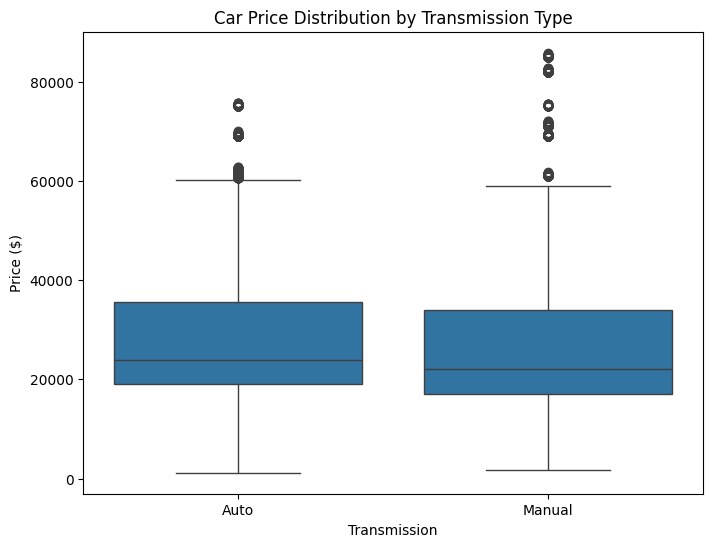

IQR of Prices by Transmission Type:
Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [73]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title('Car Price Distribution by Transmission Type')
plt.ylabel('Price ($)')
plt.show()

def iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

iqr_values = df.groupby('Transmission')['Price ($)'].apply(iqr)
print("IQR of Prices by Transmission Type:")
print(iqr_values)

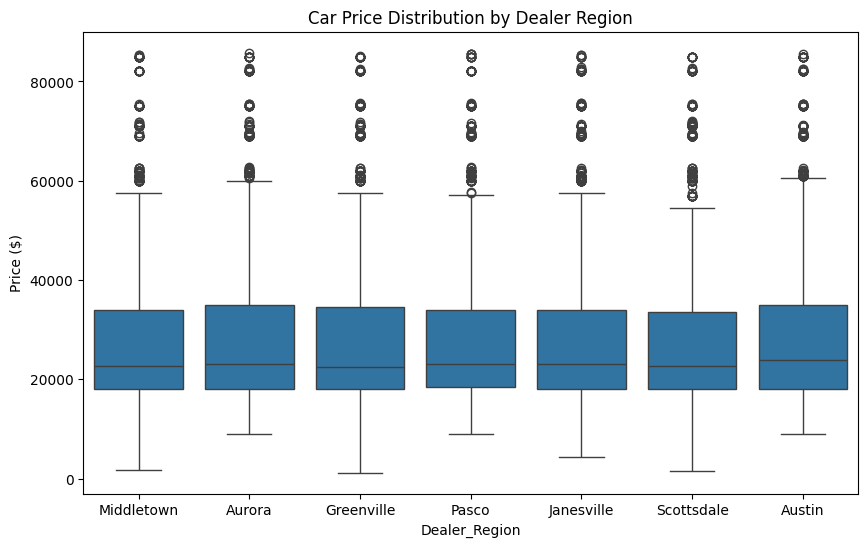

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Car Price Distribution by Dealer Region')
plt.ylabel('Price ($)')
plt.show()

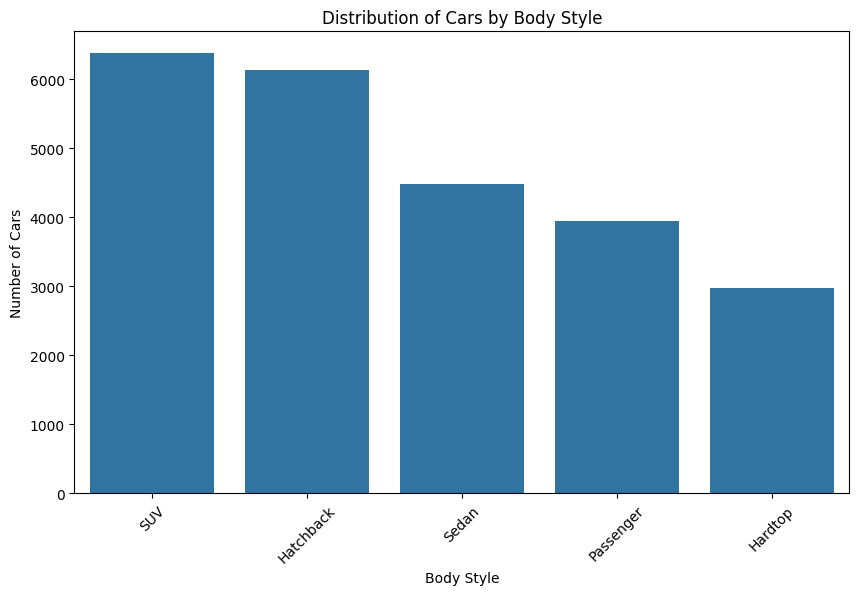

In [75]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Body Style', order=df['Body Style'].value_counts().index)
plt.title('Distribution of Cars by Body Style')
plt.xticks(rotation=45)
plt.ylabel('Number of Cars')
plt.show()

Average Selling Price by Gender:
Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


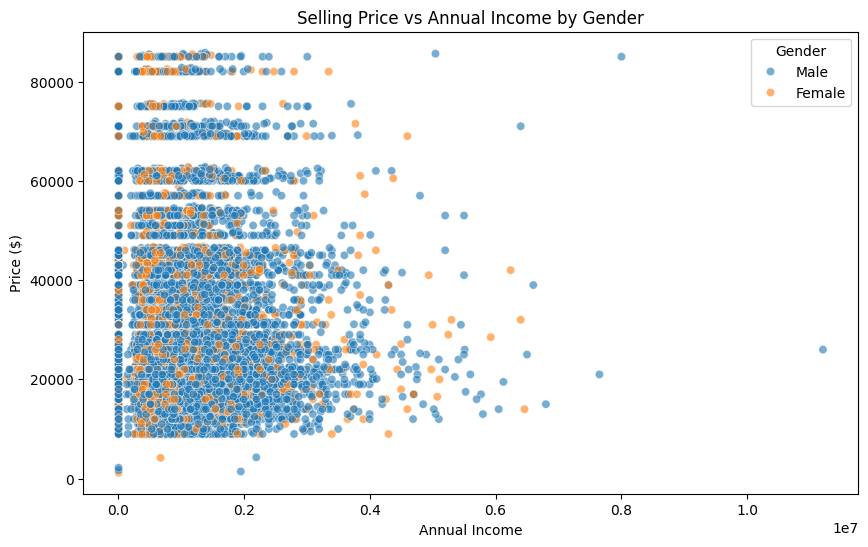

In [76]:
avg_price_gender = df.groupby('Gender')['Price ($)'].mean()
print("Average Selling Price by Gender:")
print(avg_price_gender)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Gender', alpha=0.6)
plt.title('Selling Price vs Annual Income by Gender')
plt.show()

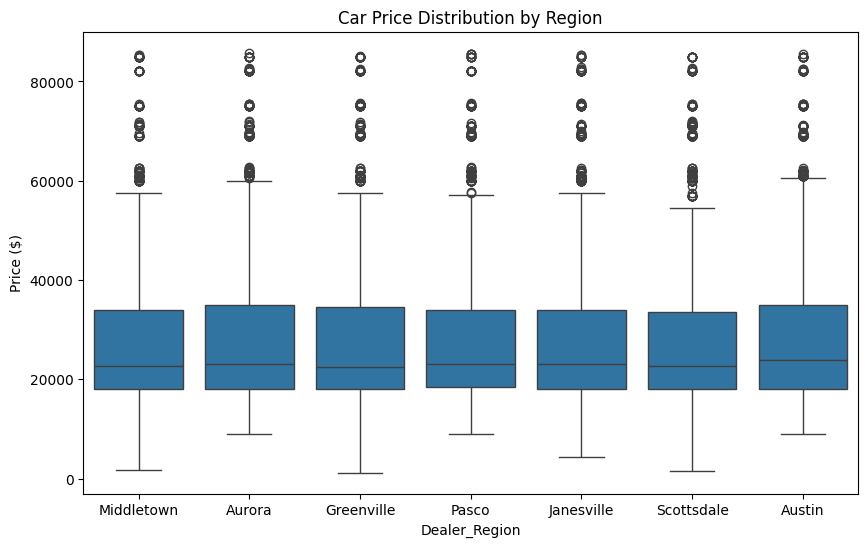

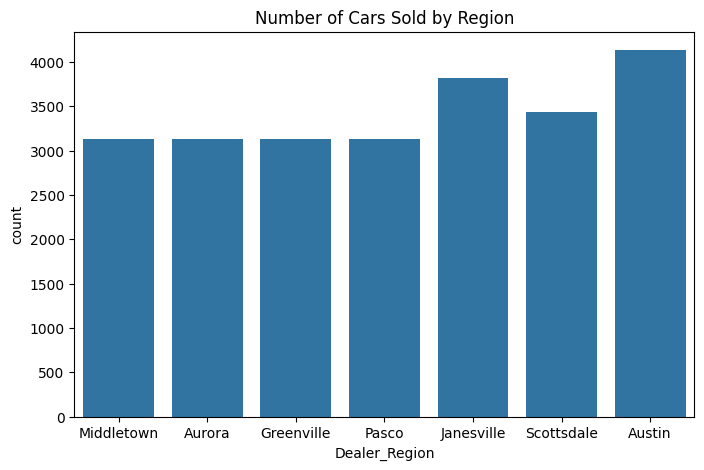

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Car Price Distribution by Region')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Dealer_Region')
plt.title('Number of Cars Sold by Region')
plt.show()

In [78]:
avg_price_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("Average Selling Price by Engine Type:")
print(avg_price_engine)


Average Selling Price by Engine Type:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


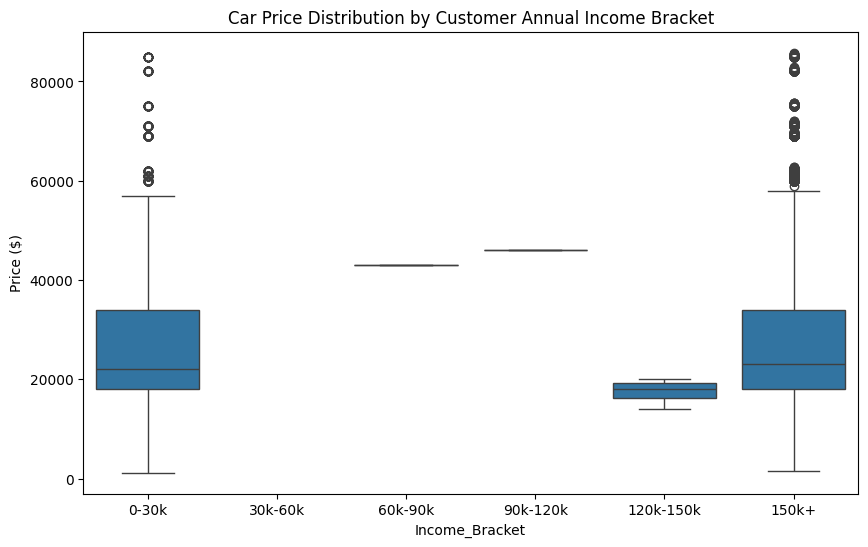

In [79]:
bins = [0, 30000, 60000, 90000, 120000, 150000, df['Annual Income'].max()]
labels = ['0-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Income_Bracket', y='Price ($)')
plt.title('Car Price Distribution by Customer Annual Income Bracket')
plt.show()

In [83]:
top_models = df['Model'].value_counts().nlargest(5).index

top_models_df = df[df['Model'].isin(top_models)]

plt.figure(figsize=(12,6))
sns.boxplot(data=top_models_df, x='Model', y='Price ($)')
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.show()


plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine')
plt.xticks(rotation=45)
plt.title('Car Price by Engine Size and Color')
plt.show()


price_variation_by_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Price Variation (STD) by Color:")
print(price_variation_by_color)


print("Top 5 Car Models by Sales:")
print(df['Model'].value_counts().nlargest(5))
plt.xticks(rotation=45)
plt.title('Car Price by Engine Size and Color')
plt.show()


top_models = df['Model'].value_counts().nlargest(5).index

top_models_df = df[df['Model'].isin(top_models)]

plt.figure(figsize=(12,6))
sns.boxplot(data=top_models_df, x='Model', y='Price ($)')
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.show()


plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine')
plt.xticks(rotation=45)
plt.title('Car Price by Engine Size and Color')
plt.show()


price_variation_by_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Price Variation (STD) by Color:")
print(price_variation_by_color)


print("Top 5 Car Models by Sales:")
print(df['Model'].value_counts().nlargest(5))

price_variation_by_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Price Variation (STD) by Color:")
print(price_variation_by_color)

top_models_df = df[df['Model'].isin(top_models)]

plt.figure(figsize=(12,6))
sns.boxplot(data=top_models_df, x='Model', y='Price ($)')
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.show()

print("Top 5 Car Models by Sales:")
print(df['Model'].value_counts().nlargest(5))
sns.boxplot(data=top_models_df, x='Model', y='Price ($)')
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.show()

print("Top 5 Car Models by Sales:")
print(df['Model'].value_counts().nlargest(5))

SyntaxError: unmatched ']' (<ipython-input-83-d9a79b18489d>, line 32)

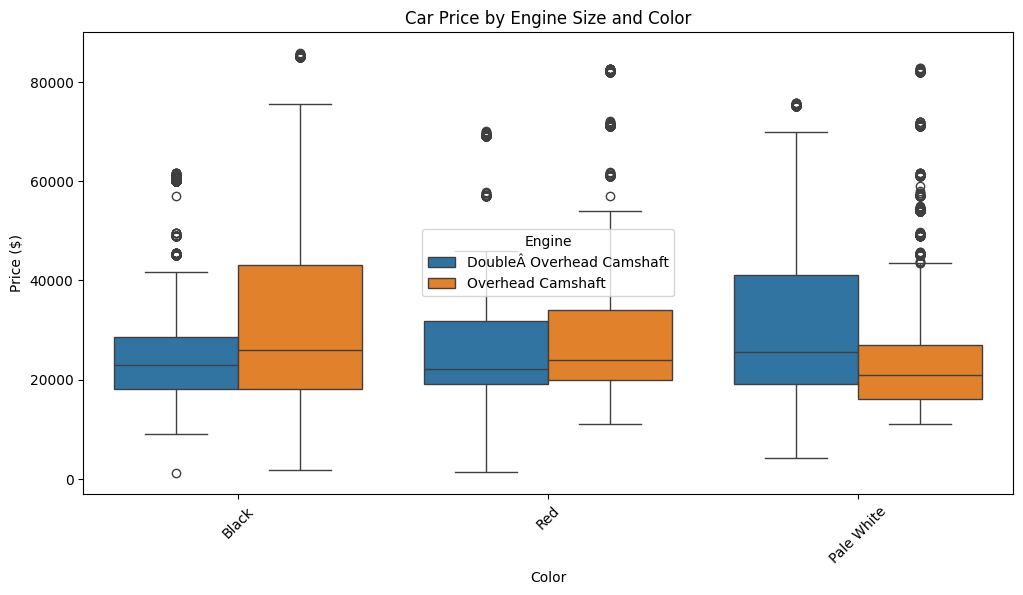

Price Variation (STD) by Color:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [81]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine')
plt.xticks(rotation=45)
plt.title('Car Price by Engine Size and Color')
plt.show()

price_variation_by_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Price Variation (STD) by Color:")
print(price_variation_by_color)

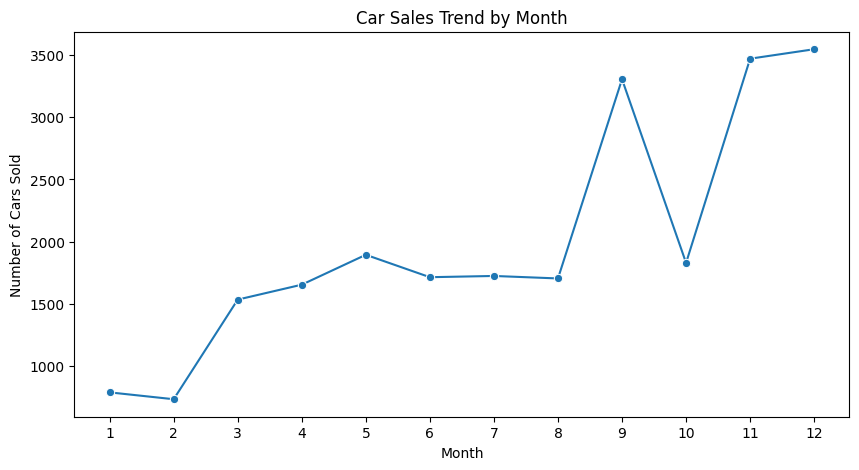

In [84]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Sale_Month'] = df['Date'].dt.month

monthly_sales = df['Sale_Month'].value_counts().sort_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Car Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13))
plt.show()

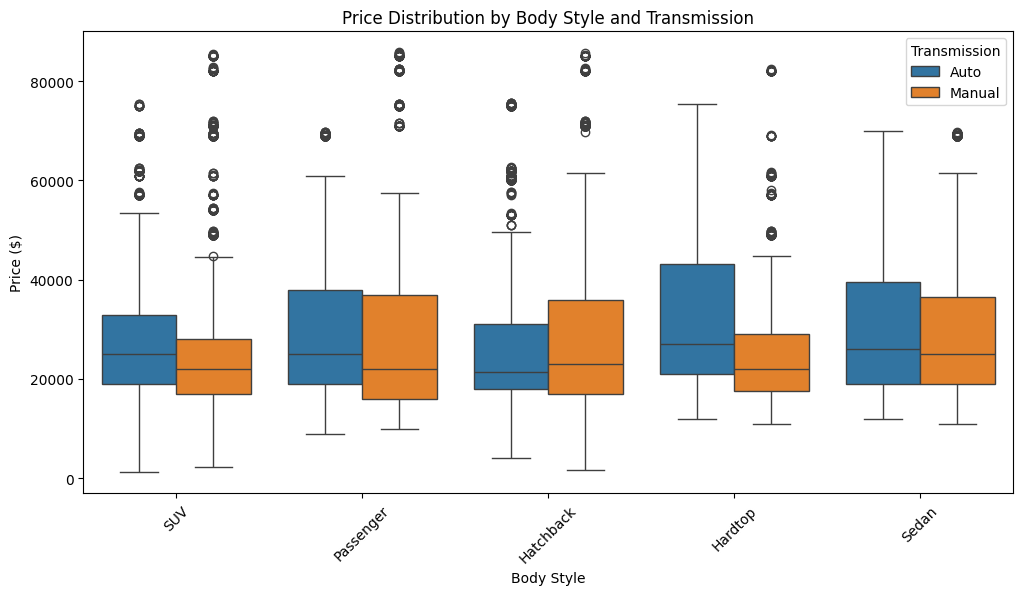

In [85]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Price Distribution by Body Style and Transmission')
plt.xticks(rotation=45)
plt.show()

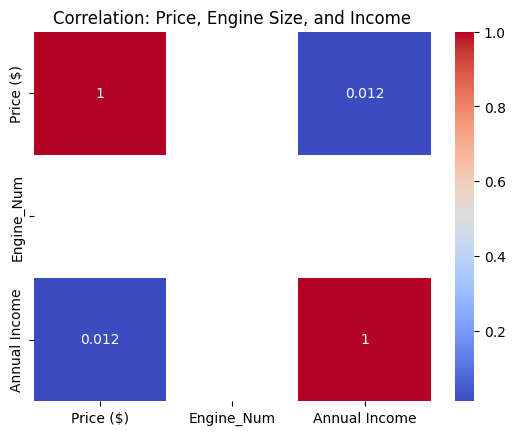

In [86]:
df['Engine_Num'] = df['Engine'].str.extract('(\d)').astype(float)

corr_df = df[['Price ($)', 'Engine_Num', 'Annual Income']]

corr = corr_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation: Price, Engine Size, and Income')
plt.show()

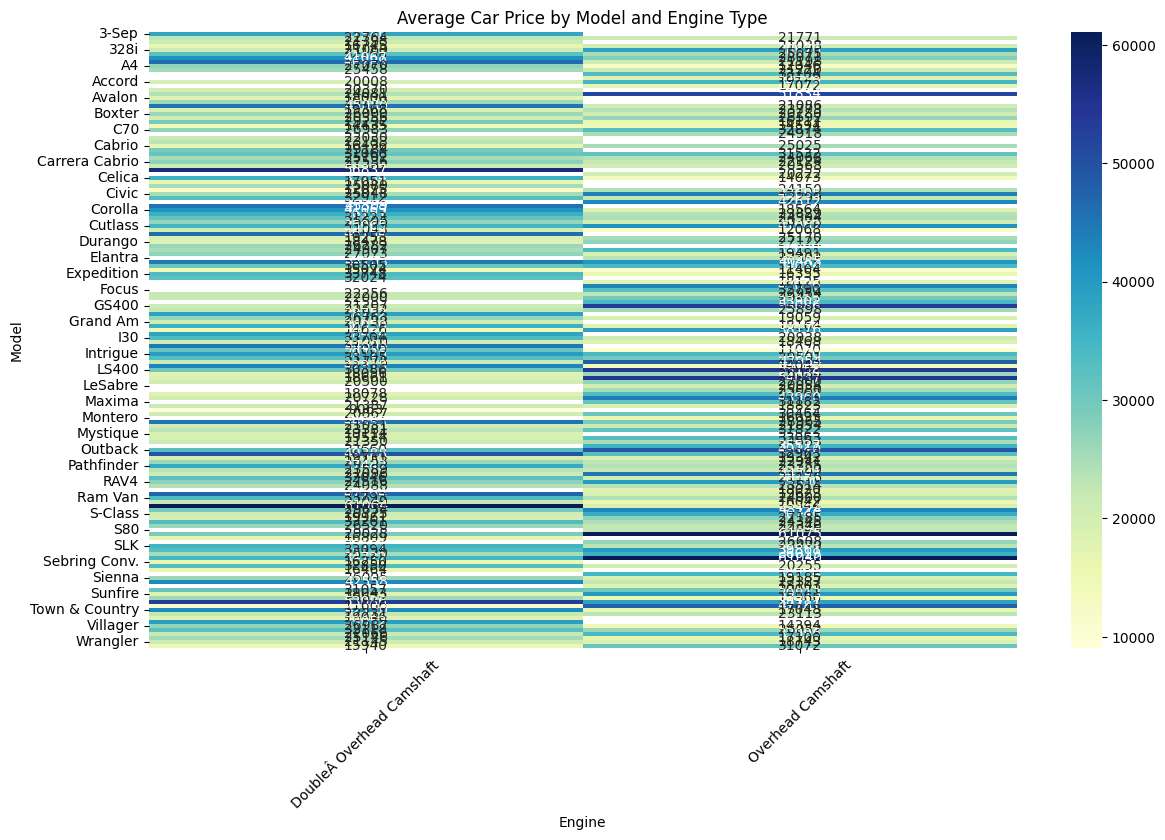

In [89]:
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

pivot_table = avg_price_model_engine.pivot(index='Model', columns='Engine', values='Price ($)')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Car Price by Model and Engine Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Amazon Sales Data

In [91]:
from google.colab import files
uploaded = files.upload()


Saving amazon.csv to amazon (1).csv


In [44]:
import pandas as pd
df = pd.read_csv('amazon.csv')


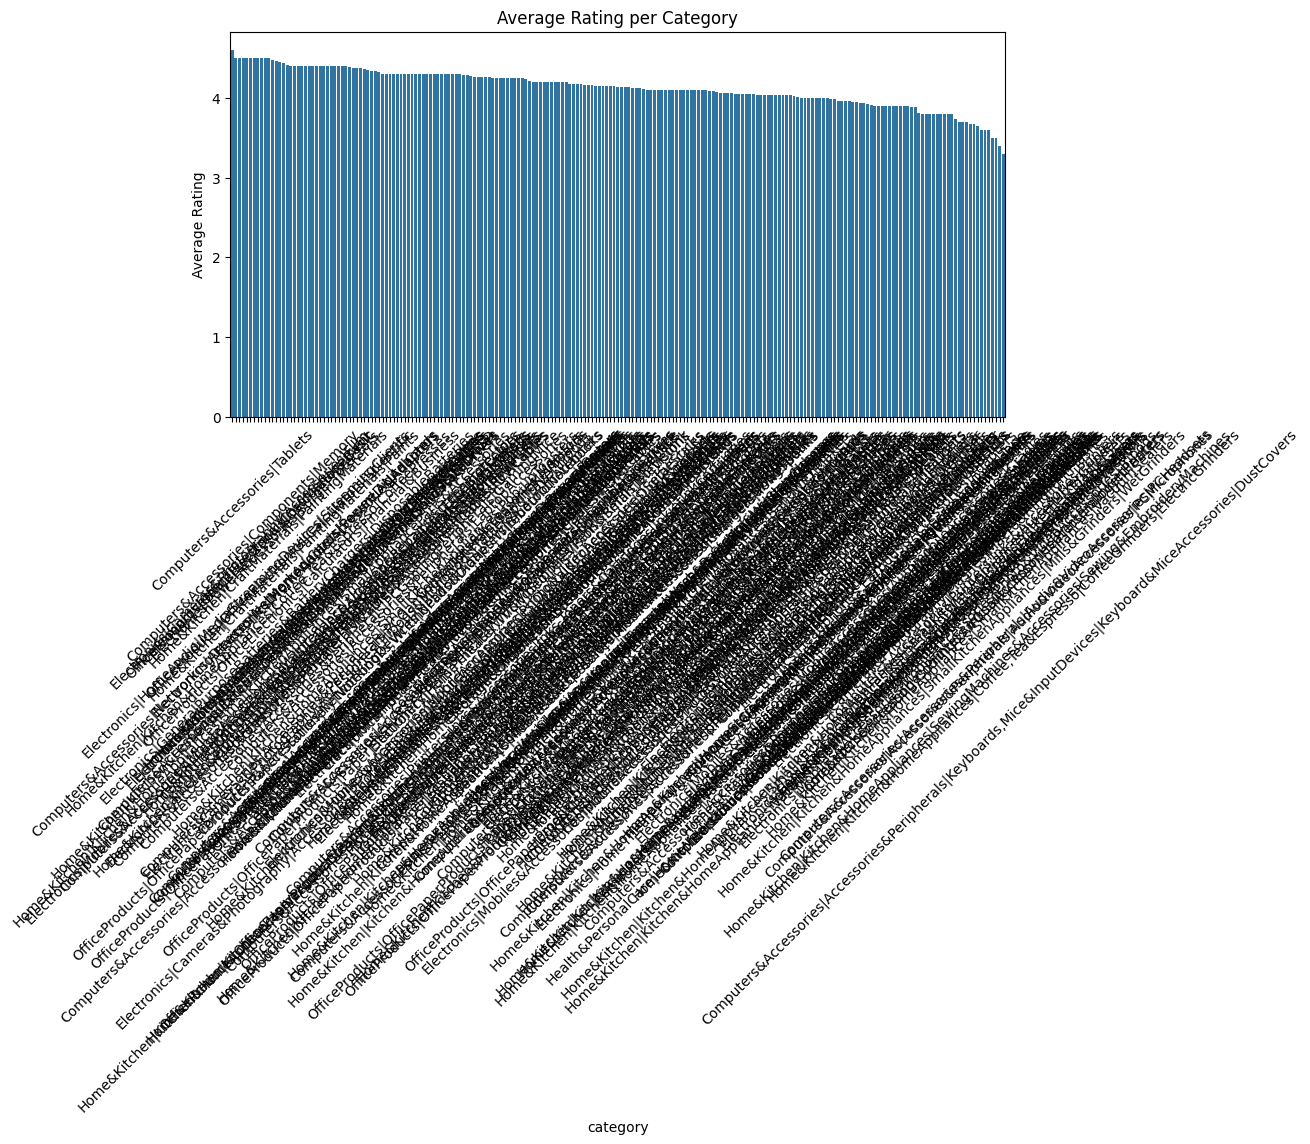

In [42]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

avg_rating_per_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating_per_category.index, y=avg_rating_per_category.values)
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.title('Average Rating per Category')
plt.show()


In [6]:
top_rated_products = df.sort_values('rating_count', ascending=False).groupby('category').head(1)
print(top_rated_products[['category', 'product_name', 'rating_count']])


                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
977   Electronics|Headphones,Earbuds&Accessories|Hea...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
151   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
895   Home&Kitchen|CraftMaterials|DrawingMaterials|D...   
941   Computers&Accessories|Printers,Inks&Accessorie...   
526   Electronics|Mobiles&Accessories|MobileAccessor...   
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   

                                           product_name rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992  
750        Eveready Red 1012 AAA Batteries - Pack of 10          989  
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250  
1059  P

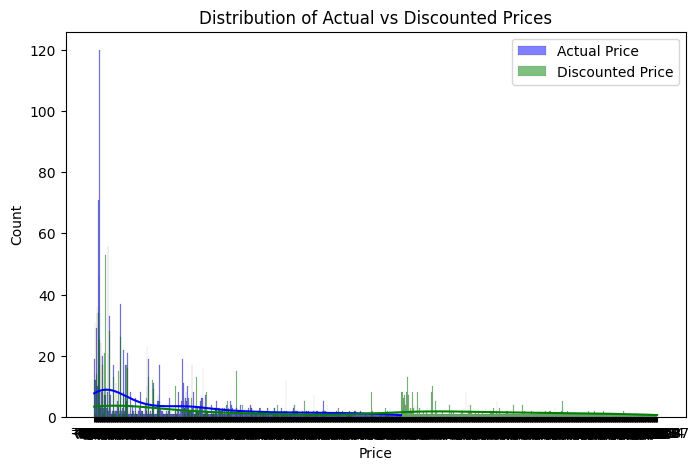

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['actual_price'], color='blue', label='Actual Price', kde=True, bins=30)
sns.histplot(df['discounted_price'], color='green', label='Discounted Price', kde=True, bins=30)
plt.legend()
plt.title('Distribution of Actual vs Discounted Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df.columns = df.columns.str.strip()

print("Columns in DataFrame:", df.columns)

if 'discount_percentage' not in df.columns and 'Discount %' in df.columns:
    df.rename(columns={'Discount %': 'discount_percentage'}, inplace=True)

if 'discount_percentage' in df.columns and 'category' in df.columns:
    df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=False).astype(float)

    avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
    print(avg_discount)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=avg_discount.index, y=avg_discount.values)
    plt.xticks(rotation=45)
    plt.ylabel('Avg. Discount %')
    plt.title('Average Discount Percentage by Category')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns 'discount_percentage' or 'category' are missing.")

Columns in DataFrame: Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_Bracket', 'Sale_Month', 'Engine_Num'],
      dtype='object')
Required columns 'discount_percentage' or 'category' are missing.


product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                            

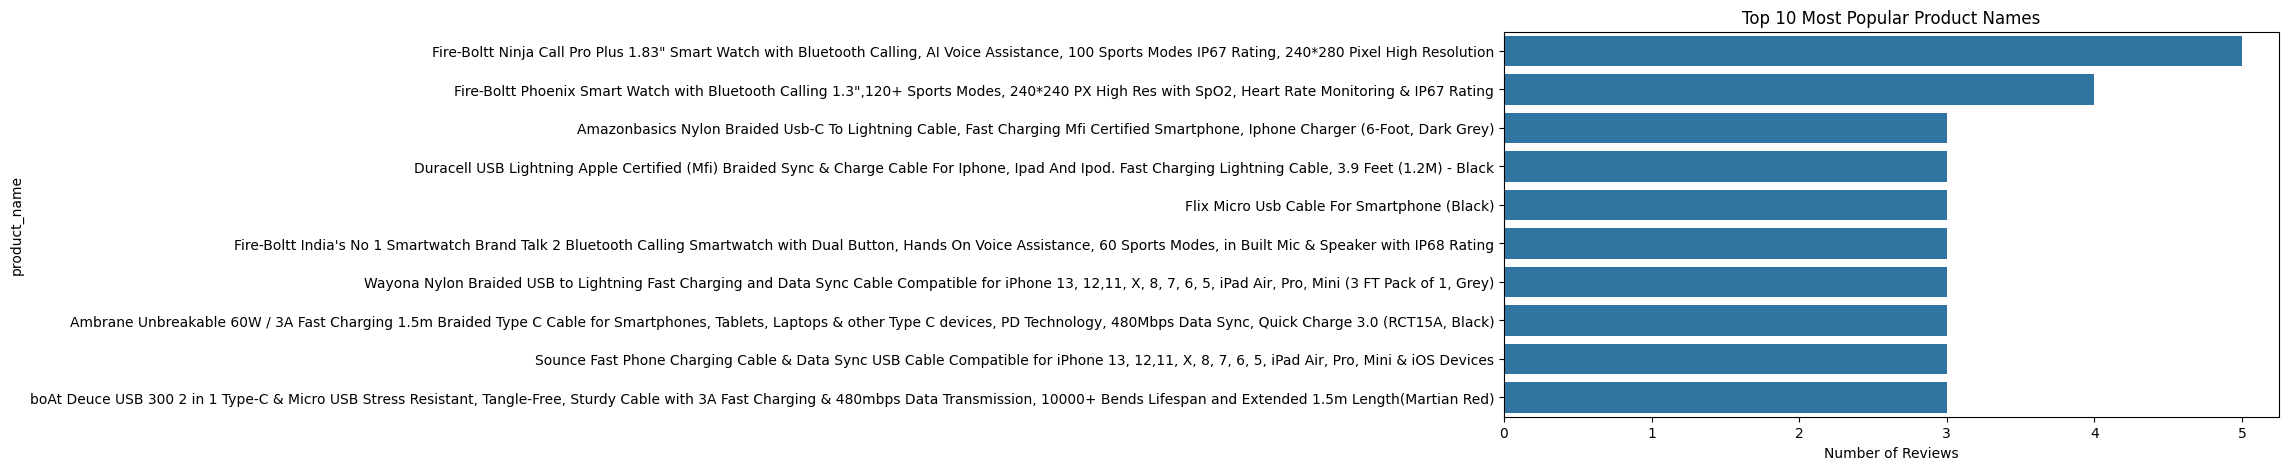

In [11]:
popular_products = df['product_name'].value_counts().head(10)
print(popular_products)
plt.figure(figsize=(10,5))
sns.barplot(x=popular_products.values, y=popular_products.index)
plt.xlabel('Number of Reviews')
plt.title('Top 10 Most Popular Product Names')
plt.show()

In [97]:

df.columns = df.columns.str.strip()

# Print column names to verify what's available
print("Available columns:", df.columns)

# Rename if a similar column like 'Product Name' exists
if 'product_name' not in df.columns and 'Product Name' in df.columns:
    df.rename(columns={'Product Name': 'product_name'}, inplace=True)

# Check again and proceed
if 'product_name' in df.columns:
    all_words = ' '.join(df['product_name'].dropna()).lower()
    words = re.findall(r'\b\w+\b', all_words)

    word_counts = Counter(words)
    popular_keywords = word_counts.most_common(10)

    print("Top 10 Product Keywords:", popular_keywords)
else:
    print("Column 'product_name' not found in the DataFrame.")

Available columns: Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_Bracket', 'Sale_Month', 'Engine_Num'],
      dtype='object')
Column 'product_name' not found in the DataFrame.


In [102]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Print current columns
print("Columns in DataFrame:", df.columns.tolist())

# Try to rename similar columns if exact ones are not found
column_map = {
    'Product Name': 'product_name',
    'Name': 'product_name',
    'Rating Count': 'rating_count',
    'Total Ratings': 'rating_count',
    'Review Title': 'review_title',
    'Title': 'review_title',
    'Review Content': 'review_content',
    'Content': 'review_content'
}

# Map columns safely
for old_col, new_col in column_map.items():
    if old_col in df.columns:
        df.rename(columns={old_col: new_col}, inplace=True)

# Check if all required columns now exist
required_cols = ['product_name', 'rating_count', 'review_title', 'review_content']
if all(col in df.columns for col in required_cols):
    popular_reviews = df[required_cols].sort_values(
        by='rating_count', ascending=False).head(10)

    print("Most Popular Reviews:\n", popular_reviews)
else:
    missing = [col for col in required_cols if col not in df.columns]
    print(f"Missing columns in DataFrame: {missing}")


Columns in DataFrame: ['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region', 'Income_Bracket', 'Sale_Month', 'Engine_Num']
Missing columns in DataFrame: ['product_name', 'rating_count', 'review_title', 'review_content']


In [103]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Print available columns
print("Available columns:", df.columns.tolist())

# Try to rename if columns are named differently
rename_map = {
    'Discounted Price': 'discounted_price',
    'Price After Discount': 'discounted_price',
    'Rating': 'rating',
    'Customer Rating': 'rating'
}

for old_name, new_name in rename_map.items():
    if old_name in df.columns:
        df.rename(columns={old_name: new_name}, inplace=True)

# Now proceed if both required columns exist
if 'discounted_price' in df.columns and 'rating' in df.columns:
    df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

    # Correlation
    correlation = df[['discounted_price', 'rating']].corr()
    print("Correlation:\n", correlation)

    # Scatter plot
    sns.scatterplot(data=df, x='discounted_price', y='rating')
    plt.title("Discounted Price vs Rating")
    plt.xlabel("Discounted Price")
    plt.ylabel("Rating")
    plt.tight_layout()
    plt.show()
else:
    print("Missing column(s): 'discounted_price' or 'rating'")

Available columns: ['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region', 'Income_Bracket', 'Sale_Month', 'Engine_Num']
Missing column(s): 'discounted_price' or 'rating'


In [15]:
top_rated_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 Categories by Average Rating:\n", top_rated_categories)


Top 5 Categories by Average Rating:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


1. High-Priced Products with Low Ratings

Some products with high actual or discounted prices are still getting low ratings. This could be a sign that customers don’t feel they’re getting value for money. It might help to either improve the product quality or be more transparent in the descriptions.

2. Low Review Counts on Many Products

A lot of products have very few or no ratings at all. This makes it hard to judge customer satisfaction and also affects trust. To fix this, we could try encouraging more customer feedback—maybe through follow-up emails or small incentives after purchase.

3. Underperforming Categories

There are certain categories where most products have lower average ratings. These might need a closer look. Maybe the products aren't good, or maybe the presentation (images, descriptions, etc.) isn’t appealing enough.

4. Discounts Not Always Helping

Interestingly, just giving big discounts doesn’t always lead to higher ratings or better sales. In some cases, it might even hurt the brand image. Discounts should probably be used more strategically—like on high-rated or new products.

5. Repetitive or Generic Product Keywords

Some product names and descriptions are filled with generic or repeated keywords. Optimizing these with better, more relevant keywords could help with both SEO and attracting the right customers.



# Spotify Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving spotify.csv to spotify.csv


In [19]:
df = pd.read_csv('spotify.csv')

In [33]:
print("Null values per column:\n", df.isnull().sum())

df = df.dropna()

print("Number of duplicate rows:", df.duplicated().sum())

Null values per column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 0


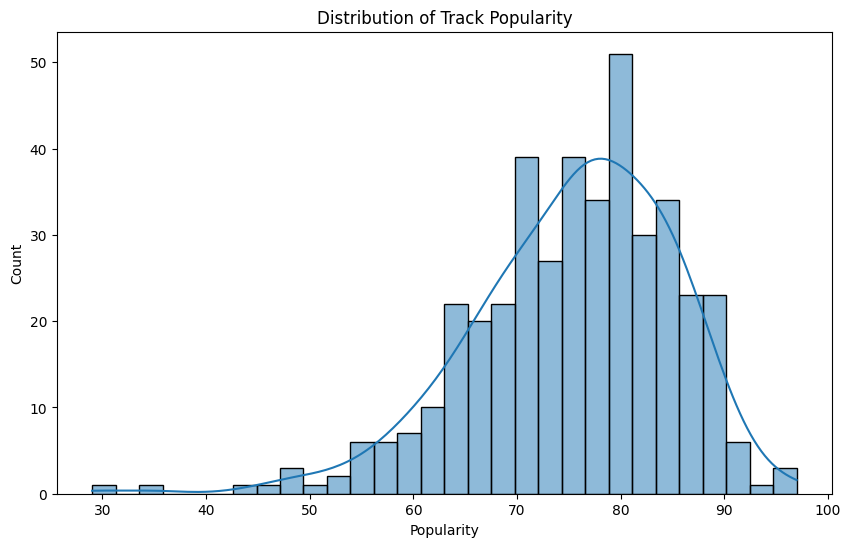

In [32]:
df = df.drop_duplicates()
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

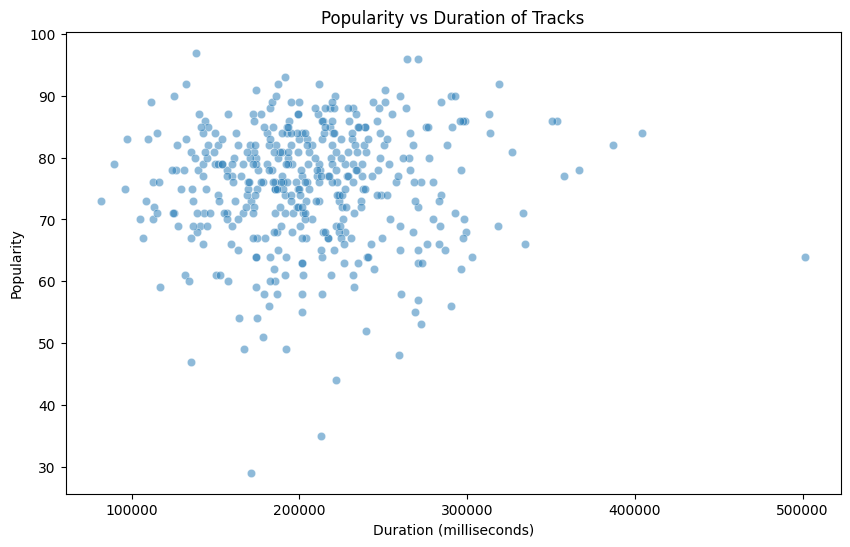

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.5)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (milliseconds)')
plt.ylabel('Popularity')
plt.show()

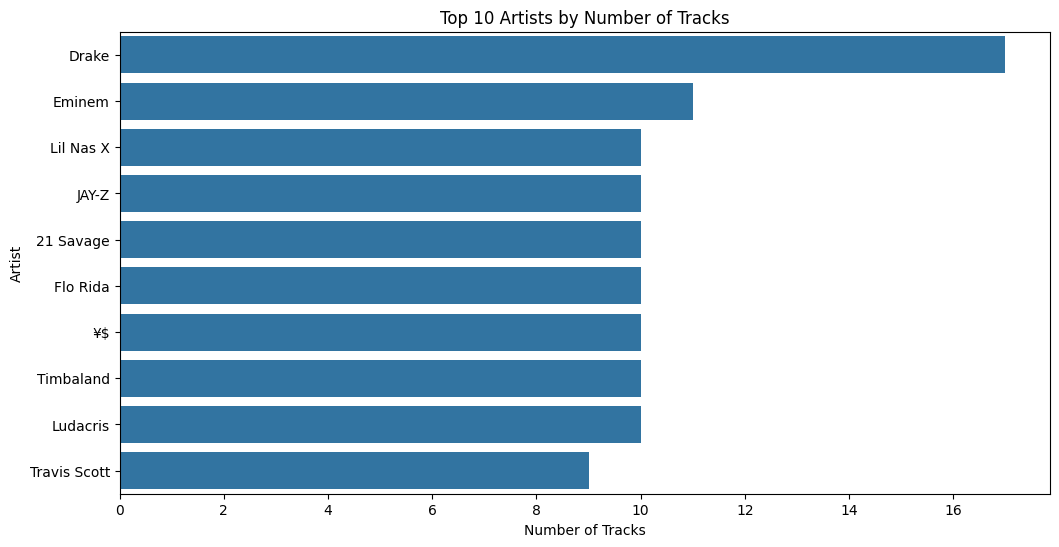

In [31]:
plt.figure(figsize=(12,6))
top_artists = df['Artist'].value_counts().head(10).index
sns.countplot(data=df[df['Artist'].isin(top_artists)], y='Artist', order=top_artists)
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

In [24]:
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 least popular tracks:")
print(least_popular_tracks)

Top 5 least popular tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [25]:

top_5_artists = df['Artist'].value_counts().head(5).index
avg_popularity = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("Average Popularity of Top 5 Artists:\n", avg_popularity)



Average Popularity of Top 5 Artists:
 Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [26]:
 most_popular_tracks = df[df['Artist'].isin(top_5_artists)].sort_values(['Artist', 'Popularity'], ascending=[True, False])
most_popular_tracks = most_popular_tracks.groupby('Artist').first()[['Track Name', 'Popularity']]
print("\nMost Popular Track for Each Top 5 Artist:\n", most_popular_tracks)




Most Popular Track for Each Top 5 Artist:
                                         Track Name  Popularity
Artist                                                        
21 Savage                                   redrum          96
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
JAY-Z                              Ni**as In Paris          86
Lil Nas X                        THATS WHAT I WANT          81


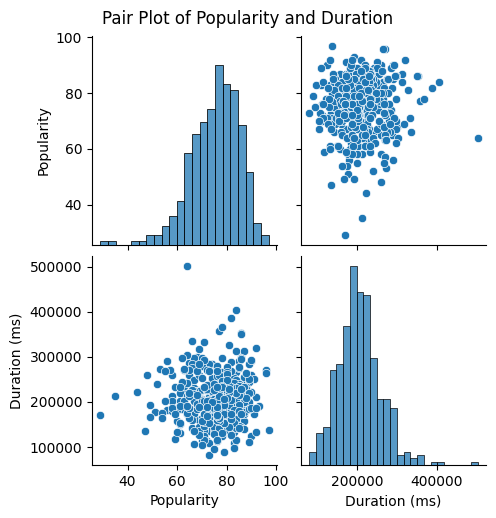

In [30]:
 sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot of Popularity and Duration', y=1.02)
plt.show()



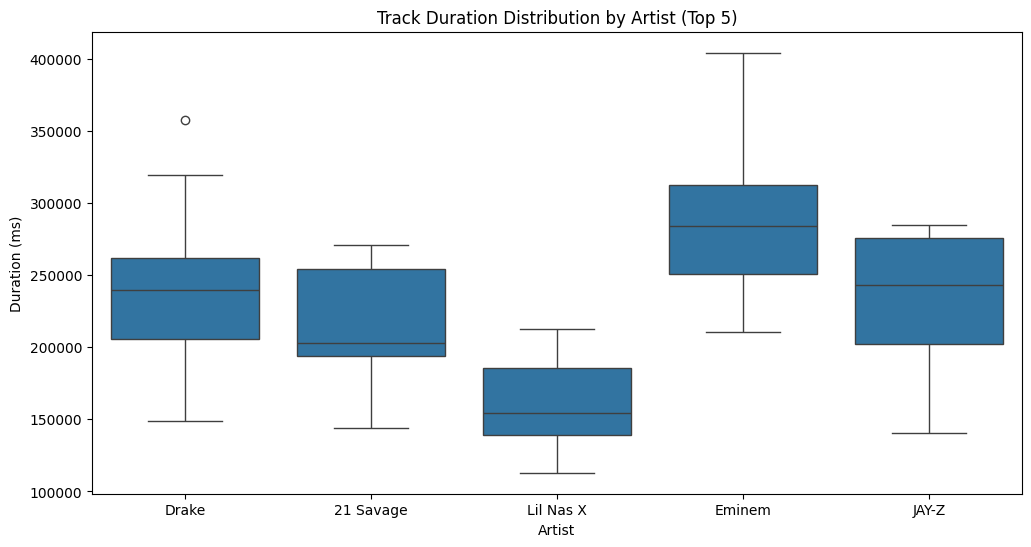

In [28]:
 plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Artist'].isin(top_5_artists)], x='Artist', y='Duration (ms)')
plt.title('Track Duration Distribution by Artist (Top 5)')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()



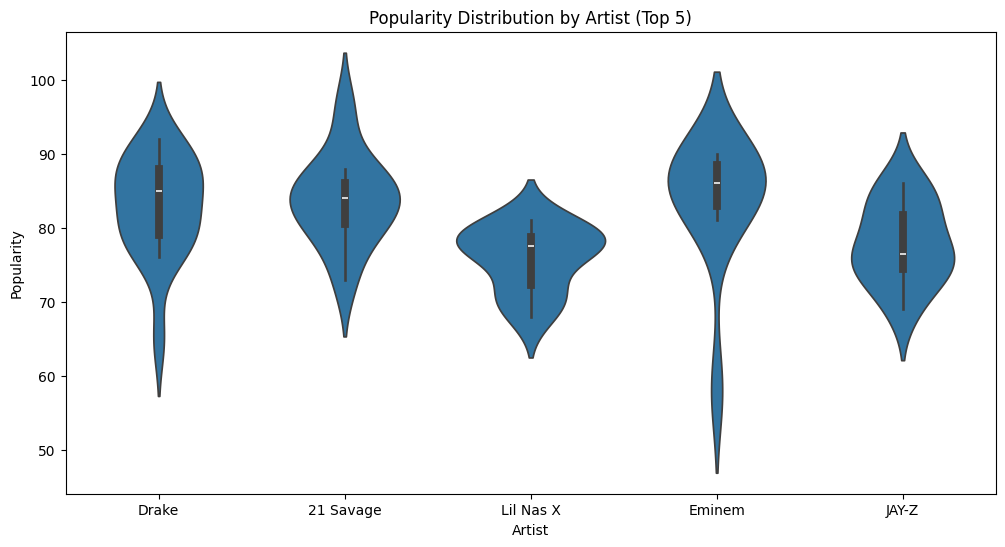

In [29]:
 plt.figure(figsize=(12,6))
sns.violinplot(data=df[df['Artist'].isin(top_5_artists)], x='Artist', y='Popularity')
plt.title('Popularity Distribution by Artist (Top 5)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()